In [1]:
from maserol.core import inferLbound
from maserol.preprocess import prepare_data, HIgGs
from maserol.core import *
import seaborn as sns

In [2]:
import numpy as np

In [14]:
L0 = 1e-9
KxStar = 1e-12
ab_types = ("IgG1",)

Rtot_np = np.random.rand(3000, 1, 1)
log_steps = 9
idx_stepsize = int(Rtot_np.shape[0] / log_steps)
for i in range(log_steps):
    Rtot_np[i * idx_stepsize:(i+1) * idx_stepsize, :, :] *= 10**i
Rtot = xr.DataArray(Rtot_np, [np.arange(Rtot_np.shape[0]), list(ab_types), np.arange(Rtot_np.shape[2])], ["Sample", "Antibody", "Antigen"],)

In [27]:
cube = xr.DataArray(np.zeros((Rtot.shape[0], 2, Rtot.shape[2])), (Rtot.Sample.values, ["IgG1", "FcgRI"], Rtot.Antigen.values),  ("Sample", "Receptor", "Antigen"))
Ka = assembleKav(cube, ab_types)
Lbound = inferLbound(cube.values, Rtot.values, Ka.values, lrank=False, L0=L0, KxStar=KxStar, FcIdx=1)
cube.values = Lbound

(3000, 1, 1)


  2%|▏         | 11/500 [00:00<00:40, 12.05it/s, g=1.45e-05, loss=3.79e+02]

Exit message: Optimization terminated successfully.
Exit status: 0


Text(0, 0.5, 'Log(Forward-Backward Rtot)')

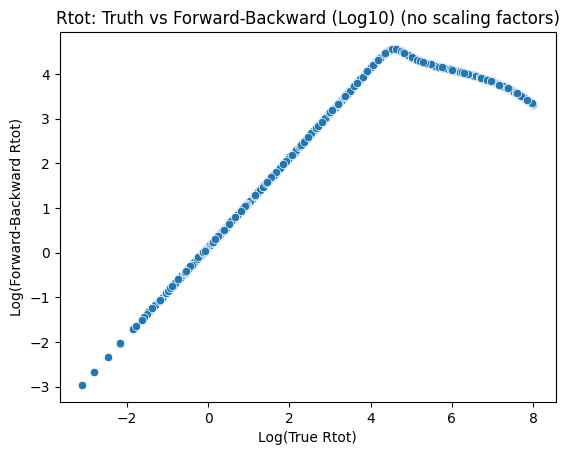

In [33]:
x, _ = optimizeLoss(cube, metric="mean_direct", lrank=False, fitKa=False, ab_types=ab_types, L0=L0, KxStar=KxStar)
ax = sns.scatterplot(x=np.log10(Rtot_np.flatten()), y=np.log10(np.exp(x)))
ax.set_title("Rtot: Truth vs Forward-Backward (Log10) (no scaling factors)")
ax.set_xlabel("Log(True Rtot)")
ax.set_ylabel("Log(Forward-Backward Rtot)")

(3000, 1, 1)


  4%|▍         | 20/500 [00:00<00:21, 22.41it/s, g=7.54e-05, loss=3.77e+02]

Exit message: Optimization terminated successfully.
Exit status: 0


Text(0, 0.5, 'Log(Forward-Backward Rtot)')

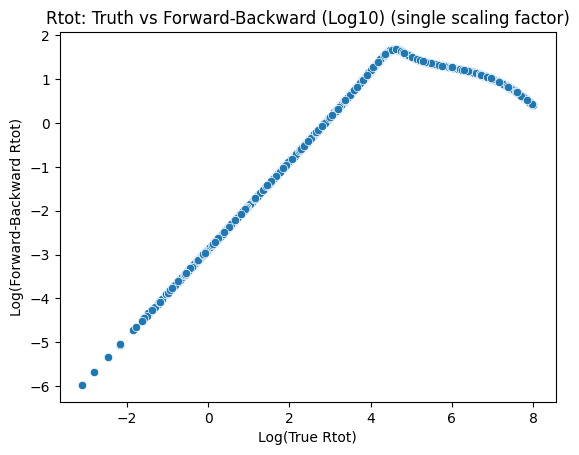

In [35]:
x, _ = optimizeLoss(cube, metric="mean", lrank=False, fitKa=False, ab_types=ab_types, L0=L0, KxStar=KxStar)
x = x[:-1]
ax = sns.scatterplot(x=np.log10(Rtot_np.flatten()), y=np.log10(np.exp(x)))
ax.set_title("Rtot: Truth vs Forward-Backward (Log10) (single scaling factor)")
ax.set_xlabel("Log(True Rtot)")
ax.set_ylabel("Log(Forward-Backward Rtot)")

(3000, 1, 1)


  4%|▍         | 20/500 [00:00<00:21, 22.59it/s, g=1.13e-05, loss=3.26e+02]

Exit message: Optimization terminated successfully.
Exit status: 0


Text(0, 0.5, 'Log(Forward-Backward Rtot)')

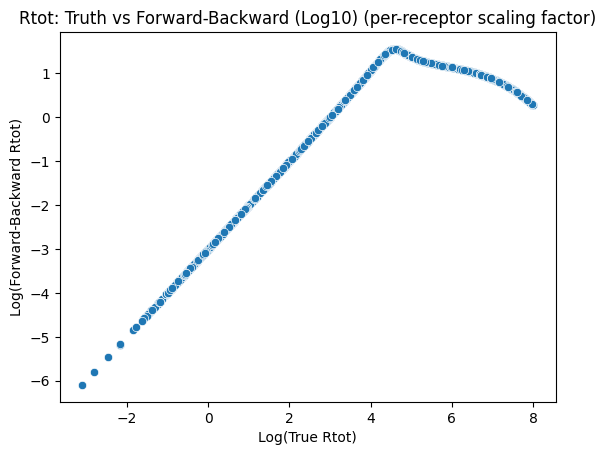

In [37]:
x, _ = optimizeLoss(cube, metric="mean_rcp", lrank=False, fitKa=False, ab_types=ab_types, L0=L0, KxStar=KxStar)
x = x[:-2]
ax = sns.scatterplot(x=np.log10(Rtot_np.flatten()), y=np.log10(np.exp(x)))
ax.set_title("Rtot: Truth vs Forward-Backward (Log10) (per-receptor scaling factor)")
ax.set_xlabel("Log(True Rtot)")
ax.set_ylabel("Log(Forward-Backward Rtot)")